In [140]:
import pandas as pd
import re

df = pd.read_excel("./UN_MigrantStockTotal_2015.xlsx",sheet_name="Table 2")

#dropping unnecessary information
df = df.drop(range(0,15))

#named each colums, will split them later (especially year and gender which is now combinded together)
df.columns=['Sort', 'Country/Area','Notes','Country Code','1990b', '1995b', '2000b','2005b','2010b','2015b','1990m', '1995m', '2000m','2005m','2010m','2015m','1990f', '1995f', '2000f','2005f','2010f','2015f']

#droped three columns, will fix later if needed
df = df.drop('Notes', axis=1)
#df = df.drop('Data Type', axis=1)
df = df.drop('Sort', axis=1)

#showing rows of current data frame
df.head(100)

,Country/Area,Country Code,1990b,1995b,2000b,2005b,2010b,2015b,1990m,1995m,2000m,2005m,2010m,2015m,1990f,1995f,2000f,2005f,2010f,2015f
15,WORLD,900,5309667.699,5735123.084,6126622.121,6519635.850,6929725.043,7349472.099,2670423.701,2886635.893,3084537.662,3285082.249,3493956.904,3707205.753,2639243.998,2848487.191,3042084.459,3234553.601,3435768.139,3642266.346
16,Developed regions,901,1144463.062,1169761.211,1188811.731,1208919.509,1233375.711,1251351.086,555255.626,568268.456,578010.218,587962.213,599955.476,609297.148,589207.436,601492.755,610801.513,620957.296,633420.235,642053.938
17,Developing regions,902,4165204.637,4565361.873,4937810.390,5310716.341,5696349.332,6098121.013,2115168.075,2318367.437,2506527.444,2697120.036,2894001.428,3097908.605,2050036.562,2246994.436,2431282.946,2613596.305,2802347.904,3000212.408
18,Least developed countries,941,510057.629,585189.354,664386.087,752804.951,847254.847,954157.804,254042.556,292026.742,331482.475,375757.715,422397.532,476031.179,256015.073,293162.612,332903.612,377047.236,424857.315,478126.625
19,Less developed regions excluding least develop...,934,3655147.008,3980172.519,4273424.303,4557911.390,4849094.485,5143963.209,1861125.519,2026340.695,2175044.969,2321362.321,2471603.896,2621877.426,1794021.489,1953831.824,2098379.334,2236549.069,2377490.589,2522085.783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,Timor-Leste,626,740.231,856.439,847.185,989.497,1057.122,1184.765,374.461,432.836,429.568,501.631,536.873,601.573,365.77,423.603,417.617,487.866,520.249,583.192
111,Viet Nam,704,68209.604,75198.975,80285.563,84203.817,88357.775,93447.601,33583.93,37054.251,39551.403,41469.757,43626.869,46224.469,34625.674,38144.724,40734.16,42734.06,44730.906,47223.132
112,Southern Asia,5501,1189260.506,1319395.960,1451932.761,1581124.102,1702990.822,1822974.074,613752.446,680956.361,749146.31,816105.9,877821.041,938880.969,575508.06,638439.599,702786.451,765018.202,825169.781,884093.105
113,Afghanistan,4,12067.57,16772.522,19701.940,24399.948,27962.207,32526.562,6179.834,8682.442,10146.537,12616.326,14367.633,16773.704,5887.736,8090.08,9555.403,11783.622,13594.574,15752.858


In [141]:
#splitting my dataframe #1 for regions


regionsDf = df[(df['Country Code'] == 901)|(df['Country Code'] == 902)|(df['Country Code'] == 941)|(df['Country Code'] == 934)] 

#right here I am melting the year column using pandas documentation following tidy data principle #1 Column names need to be informative, variable names and not values
regionsDf = regionsDf.melt(id_vars=["Country/Area","Country Code"], var_name=["Years"],value_name="Total population at mid-year (thousands)")
regionsDf.rename(columns={'Country/Area': 'Regions'}, inplace=True)
#here I am seperating year from gender following tidy data principle #2 each column needs to consist of one and only one variable
regionsDf=(regionsDf.assign(Gender = lambda x: x.Years.str[4].astype(str), Year = lambda x: x.Years.str[:4].astype(str)).drop("Years",axis=1))

regionsDf.head(100)

,Regions,Country Code,Total population at mid-year (thousands),Gender,Year
0,Developed regions,901,1144463.062,b,1990
1,Developing regions,902,4165204.637,b,1990
2,Least developed countries,941,510057.629,b,1990
3,Less developed regions excluding least develop...,934,3655147.008,b,1990
4,Developed regions,901,1169761.211,b,1995
...,...,...,...,...,...
67,Less developed regions excluding least develop...,934,2377490.589,f,2010
68,Developed regions,901,642053.938,f,2015
69,Developing regions,902,3000212.408,f,2015
70,Least developed countries,941,478126.625,f,2015


In [142]:
#splitting my dataframe #2 for Countries

#identifying the data I want to include for this table according to their country code
CountryDf = df[(df['Country Code'] <900)]

#right here I am melting the year column using pandas documentation following tidy data principle #1 Column names need to be informative, variable names and not values
CountryDf = CountryDf.melt(id_vars=["Country/Area","Country Code"], var_name=["Years"],value_name="Total population at mid-year (thousands)")

#renaming the column to Countries
CountryDf.rename(columns={'Country/Area': 'Countries'}, inplace=True)

#here I am seperating year from gender following tidy data principle #2 each column needs to consist of one and only one variable
CountryDf=(CountryDf.assign(Gender = lambda x: x.Years.str[4].astype(str), Year = lambda x: x.Years.str[:4].astype(str)).drop("Years",axis=1))

CountryDf.head(100)

,Countries,Country Code,Total population at mid-year (thousands),Gender,Year
0,Burundi,108,5613.141,b,1990
1,Comoros,174,415.144,b,1990
2,Djibouti,262,588.356,b,1990
3,Eritrea,232,3139.083,b,1990
4,Ethiopia,231,48057.094,b,1990
...,...,...,...,...,...
95,Iraq,368,17478.455,b,1990
96,Israel,376,4499.161,b,1990
97,Jordan,400,3358.453,b,1990
98,Kuwait,414,2058.832,b,1990


In [143]:
#splitting my dataframe #3 for Area of Destination

#Identifying the parameters I want to include in this data, sorting them according to country codes
AreaDf = df[((df['Country Code'] > 903) & (df['Country Code']< 954))|(df['Country Code']== 5501)|(df['Country Code']== 5500)]

#Because some of the areas includes regions between 903 to 954, I want to exclude the regions in here so I am using a function including the "not equal to "
AreaDf = AreaDf[(AreaDf['Country Code'] != 941)&(AreaDf['Country Code'] !=901)&(AreaDf['Country Code'] !=902)&(AreaDf['Country Code'] !=934)]

#renaming the column using pandas documentation
AreaDf.rename(columns={'Country/Area': 'Area of Destination'}, inplace=True)

#right here I am melting the year column using pandas documentation following tidy data principle #1 Column names need to be informative, variable names and not values
AreaDf = AreaDf.melt(id_vars=["Area of Destination","Country Code"], var_name=["Years"],value_name="Total population at mid-year (thousands)")

#here I am seperating year from gender following tidy data principle #2 each column needs to consist of one and only one variable
AreaDf=(AreaDf.assign(Gender = lambda x: x.Years.str[4].astype(str), Year = lambda x: x.Years.str[:4].astype(str)).drop("Years",axis=1))

AreaDf.head(100)

,Area of Destination,Country Code,Total population at mid-year (thousands),Gender,Year
0,Sub-Saharan Africa,947,491497.691,b,1990
1,Eastern Africa,910,198231.687,b,1990
2,Middle Africa,911,70886.433,b,1990
3,Northern Africa,912,140116.613,b,1990
4,Southern Africa,913,42049.013,b,1990
...,...,...,...,...,...
95,South America,931,374809.128,b,2005
96,Northern America,905,328524.304,b,2005
97,Oceania,909,33369.472,b,2005
98,Australia and New Zealand,927,24408.981,b,2005


In [144]:
WorldDf = df[(df['Country Code'] == 900)] 

#Melting the year column using pandas documentation following tidy data principle #1 Column names need to be informative, variable names and not values
WorldDf = WorldDf.melt(id_vars=["Country/Area","Country Code"], var_name=["Years"],value_name="Total population at mid-year (thousands)")

#Renaming column to world
WorldDf.rename(columns={'Country/Area': 'Regions'}, inplace=True)

#here I am seperating year from gender following tidy data principle #2 each column needs to consist of one and only one variable
WorldDf=(WorldDf.assign(Gender = lambda x: x.Years.str[4].astype(str), Year = lambda x: x.Years.str[:4].astype(str)).drop("Years",axis=1))

WorldDf.head(30)

,Regions,Country Code,Total population at mid-year (thousands),Gender,Year
0,WORLD,900,5309667.699,b,1990
1,WORLD,900,5735123.084,b,1995
2,WORLD,900,6126622.121,b,2000
3,WORLD,900,6519635.85,b,2005
4,WORLD,900,6929725.043,b,2010
5,WORLD,900,7349472.099,b,2015
6,WORLD,900,2670423.701,m,1990
7,WORLD,900,2886635.893,m,1995
8,WORLD,900,3084537.662,m,2000
9,WORLD,900,3285082.249,m,2005


In [145]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline


WorldDf.shape

(18, 5)

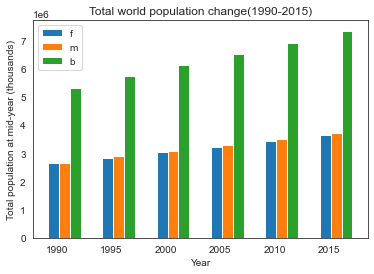

In [146]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#compare total population in world through out the years



#set x values and three bar values
w=0.2
x=["1990","1995","2000","2005","2010","2015"]
#y=[2000000,3000000,4000000,5000000,600000,7000000,800000]
f=[2639243.998,2848487.191,3042084.459,3234553.601,3435768.139,3642266.346]
m=[2670423.701,2886635.893,3084537.662,3285082.249,3493956.904,3707205.753]
b=[5309667.699,5735123.084,6126622.121,6519635.85,6929725.043,7349472.099]


#arange bar settings
bar1=np.arange(len(x))
bar2=[i+w for i in bar1]
bar3=[i+w for i in bar2]
plt.bar(bar1,f,w,label="f")
plt.bar(bar2,m,w,label="m")
plt.bar(bar3,b,w,label="b")

#label the x and y axis
plt.xlabel("Year")
plt.ylabel("Total population at mid-year (thousands)")
plt.xticks(bar1+w/3,x,)
plt.legend()
plt.title("Total world population change(1990-2015)")
plt.show()
     

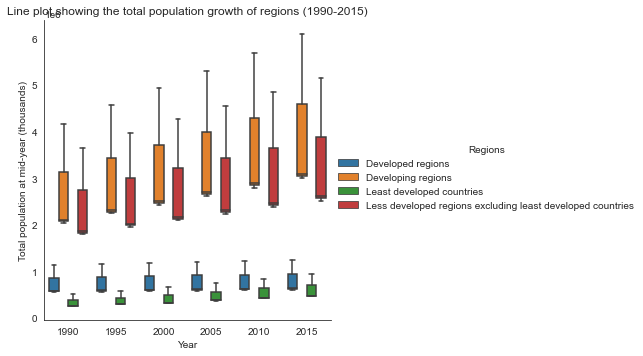

In [168]:
sns.set_style('white')

#box chart showing the diffrent distribution of population with different regions  

ax.set_title('Line plot showing the total population growth of regions (1990-2015)',fontweight="bold")
ax.set_ylabel('')

sns.catplot(data=regionsDf, kind="box", x="Year", y="Total population at mid-year (thousands)", hue="Regions")

plt.title("Line plot showing the total population growth of regions (1990-2015)")
plt.show()



sns.set_style('white')

RegionScaDf = regionsDf[(regionsDf['Gender']  == 'b')]
#we will be showing 
f, ax = plt.subplots(1, 1, figsize=(10,10))
f.suptitle('Plots showing relationship between year and total population',fontweight='bold',fontsize=16)

ax.set_title('Scatter plot showing the total population growth of regions (1990-2015)',fontweight="bold")
ax.set_ylabel('')
sns.lineplot(y="Total population at mid-year (thousands)", x="Year", hue = "Regions",data=RegionScaDf, ax=ax)



f.tight_layout()
f.subplots_adjust(top=.93)
plt.show()

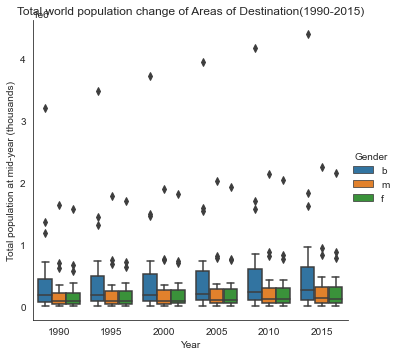

In [165]:
sns.set_style('white')
#we will be showing the world population change/distribution in respect to areas

ax.set_title('Line plot showing the total population growth of regions (1990-2015)',fontweight="bold")
ax.set_ylabel('')


sns.catplot(data=AreaDf, kind="box", x="Year", y="Total population at mid-year (thousands)", hue="Gender")

plt.title("Total world population change of Areas of Destination(1990-2015)")
plt.show()


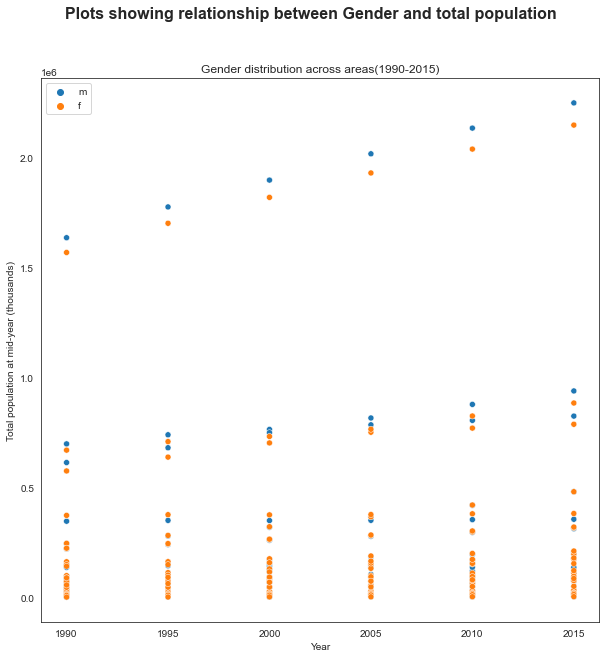

In [171]:
sns.set_style('white')
#we will be showing the world population in respect to female and male in different areas
NareaDf=AreaDf[(AreaDf['Gender'] == 'f')|(AreaDf['Gender'] == 'm')] 

f, ax = plt.subplots(1, 1, figsize=(10,10))
f.suptitle('Plots showing relationship between Gender and total population',fontweight='bold',fontsize=16)
ax.set_title('Line plot showing the total population growth of regions (1990-2015)',fontweight="bold")
ax.set_ylabel('')


sns.scatterplot(data=NareaDf, x="Year", y="Total population at mid-year (thousands)", hue="Gender",ax=ax)

plt.title("Gender distribution across areas(1990-2015)")
plt.legend()
plt.show()